<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Differential equations</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
from IPython.core.display import HTML, Image
css_file = 'custom.css'
HTML(open(css_file, 'r').read())

In [34]:
from numpy import linspace, sqrt # Create an array of value and take a square root
from sympy import init_printing # Latex printing to screen
from matplotlib.pyplot import plot, show # Plotting
from sympy import symbols, Function, exp, Derivative, diff, classify_ode, dsolve # Sympy functions
from warnings import filterwarnings # Ignoring ugly pink warnings

In [35]:
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')
% matplotlib inline

# Verifying solutions to ODEs

We have solved many ODEs up until now and have learned quite a few techniques.  We haven't given much thought to the actual solutions, though.  Are they correct?  Do they exist?  If so, are they retsricted to some interval?

## In this lesson
- [The solution on an interval](#The-solution-on-an-interval)
- [Analytical verification](#Analytical-verification)
    - [Example 1](#Example-1)
    - [Example 2](#Example-2)
- [Implicit solutions](#Implicit-solutions)
- [A solution curve](#A-solution-curve)
- [Initial values](#Initial-values)
- [Existance and uniqueness](#Existance-and-uniqueness)

## The solution on an interval

The solution to an ODE exists (if is does) on an interval.  We that the solution to a DE on an interval is a function, $ F $, that is defined on an interval, $ I $ that possesses at least $ n $ derivatives that are continuous on $ I $, which when substituted into an $ n $<sup>th</sup>-order ODE reduces said equation to an identity.

The interval is referred to by many names
- Interval of definition
- Interval of existence
- Interval of validity

or simply just the domain of the solution.

[Back to the top](#In-this-lesson)

## Analytical verification

### Example 1

Let's see of $ y \left( t \right) = \frac{1}{36} {t}^{6} $ is a solution to the ODE $ \frac{dy}{dt} = {t}^{2} \sqrt{y} $.

On the left we have:
$$ \frac{dy}{dt} = \frac{1}{36} 6 {t}^{5} = \frac{1}{6} {t}^{5} $$
On the right we have:
$$ \frac{dy}{dt} = {t}^{2} \sqrt{ \frac{1}{36} {t}^{6} } = \frac{1}{6} {t}^{5} $$

We note that $  \left( t \right) = \frac{1}{36} {t}^{6} $ is indeed a solution to the ODE and that is on the interval $ - \infty \le t \le \infty $.

[Back to the top](#In-this-lesson)

### Example 2

We can extend this to ODE's of higher degree.  Let's see if $ y \left( t \right) = {c}_{1} {e}^{t} + {c}_{2} t {e}^{t} $ is a solution to $ \frac { { d }^{ 2 }y }{ d{ t }^{ 2 } } -2\frac { dy }{ dt } +y=0 $.

In [44]:
t = symbols("t")
y = Function("y")

In [20]:
eq = y(t).diff(t, t) - 2 * y(t).diff(t) + y(t)
eq

                      2      
         d           d       
y(t) - 2⋅──(y(t)) + ───(y(t))
         dt           2      
                    dt       

In [21]:
classify_ode(eq)

('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')

In [22]:
dsolve(eq, hint = "nth_linear_constant_coeff_homogeneous")

                    t
y(t) = (C₁ + C₂⋅t)⋅ℯ 

[Back to the top](#In-this-lesson)

## Implicit solutions

In the example below we can calculate an explicit solution, but stop one step before taking the square root and we have a nice example of an inplicit solution:
$$ \frac { dy }{ dt } =\frac { -t }{ y } \\ ydy=-tdt\\ \int { y } dy=\int { \left( -t \right)  } dt\\ \frac { 1 }{ 2 } { y }^{ 2 }=\frac { -1 }{ 2 } { t }^{ 2 }+{ c }_{ 1 }\\ { y }^{ 2 }=-{ t }^{ 2 }+{ c }_{ 2 }\\ { y }^{ 2 }+{ t }^{ 2 }=c $$

The solution is only defined for value of $ c $ than are equal to or larger than $ 0 $.  The domain of the solution is thus $ - \sqrt{c} \le t \le \sqrt{c} $.

[Back to the top](#In-this-lesson)

## A solution curve

With constants in our solution we can have any number of solutions depending on the value of $ c $.

In [23]:
eq = 3 * t * y(t) * y(t).diff(t) - (1 / t)
eq

         d          1
3⋅t⋅y(t)⋅──(y(t)) - ─
         dt         t

In [24]:
classify_ode(eq)

('separable',
 '1st_exact',
 'Bernoulli',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [25]:
dsolve(eq, hint = "separable")

⎡            ________              ________⎤
⎢           ╱      6              ╱      6 ⎥
⎢       -  ╱  C₁ - ─             ╱  C₁ - ─ ⎥
⎢        ╲╱        t           ╲╱        t ⎥
⎢y(t) = ──────────────, y(t) = ────────────⎥
⎣             3                     3      ⎦

Let's plot solution curves for $ c = 7 $, $ c = 10 $ and $ c = 15 $.

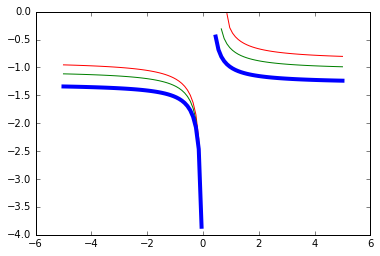

In [40]:
x = linspace(-5, 5, 100)
y7 = (-1 / 3) * sqrt(7 - 6 / x)
y10 = (-1 / 3) * sqrt(10 - 6 / x)
y15 = (-1 / 3) * sqrt(15 - 6 / x)

plot(x, y7, "r-")
plot(x, y10, "g-")
plot(x, y15, "b-", linewidth = 4)
show();

We do indeed have a **family of solutions**.

[Back to the top](#In-this-lesson)

## Initial values

We can calculate a specific value for $ c $ given an initial condition.  Imagine at $ t = 0 $ in the solution above we have that $ y \left( 1 \right) = -1 $.  Obviously the domain of the solution is $ t \in \left( -\infty, 0 \right) \cup \left( 0, \infty \right) $, i.e. $ t \ne 0 $.

Plugging this into our family of solutions we get
$$ y\left( 1 \right) =\frac { -1 }{ 3 } \sqrt { c-\frac { 6 }{ 1 }  } =-1\\ \sqrt { c-6 } =3\\ c-6=9\\ c=15\\ \therefore y\left( t \right) =\pm \frac { 1 }{ 3 } \sqrt { 15-\frac { 6 }{ t }  }  $$
which is the *blue* line above.

[Back to the top](#In-this-lesson)

## Existance and uniqueness

We have to ask ourselves two questions when considering a first-order ODE initial value problem:
- Does a solution exist?
    - Here we want to know if any of the solution curves pass through the (inital value) point $ \left( {x}_{0}, {y}_{0} \right) $.
- If a solution exists, is it unique?
    - Here we want to know if one one solution curves passes through $ \left( {x}_{0}, {y}_{0} \right) $.

There is a existence and uniqueness theorem for first-order DEs: *Consider a rectangular region, $ R $ in the $ ty $-plane defined by $ y \in \left[ a,b \right] $ and $ y \in \left[ c,d \right] $.  If we have a solution, $ F \left( t,y \right) $ and it, as well as $ \frac{ \partial F}{ \partial y} $, are continuous on $ R $, then there is some interval, $ {I}_{0} $ between $ {t}_{0} - h $ and $ {t}_{0} + h $, with $ h > 0 $ contained in $\left[ a,b \right] $ with a unique solution $ y \left( t \right) $*.

[Back to the top](#In-this-lesson)